In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calculateVaccinations(g, q, s):
    resG=g.copy()

    vQ=0
    for t in range(373,373+s.shape[0]):
        s[t-373,0]=t
        dayQuotas=[]
        if t <  q[1,0]: 
            vQ=q[0,1]
            for k in range(7):
                dayQuotas.append(q[0,k+2])
        if t >= q[1,0] and t <  q[2,0]:
            vQ=q[1,1]
            for k in range(7):
                dayQuotas.append(q[1,k+2])
        if t >= q[2,0] and t <  q[3,0]:
            vQ=q[2,1]
            for k in range(7):
                dayQuotas.append(q[2,k+2])
        if t >= q[3,0] and t <  q[4,0]:
            vQ=q[3,1]
            for k in range(7):
                dayQuotas.append(q[3,k+2])
        if t >= q[4,0]:
            vQ=q[4,1]
            for k in range(7):
                dayQuotas.append(q[4,k+2])
            
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,1,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,2,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,3,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,4,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,5,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,6,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,7,resG,s)

        
def vaccinateGroups(vQ,g,dQ,t,ng,resG,s):

    groupDayVaccQuantity=round(g[0,ng-1]*dQ[ng-1])
    #print(groupDayVaccQuantity,g[0,ng-1],dQ[ng-1])
    mm=min(resG[0,ng-1],groupDayVaccQuantity)
    #print(resG[0,ng-1],groupDayVaccQuantity,mm)
    
    if mm >=vQ:
        resG[0,ng-1]-=vQ
        vQ=0
        s[t-373,ng]-=resG[0,ng-1]
        return vQ
    else:
        vQ-=mm
        resG[0,ng-1]-=mm
        s[t-373,ng]-=resG[0,ng-1]
        return vQ
    

### Experiment III
    0 seed   96052725
    1 seed   79171489
    0 seedD  5279917

### Experiment III groups

In [4]:
g=[ 129,56,243,1541,1197,252,932 ]

In [5]:
groupM=np.matrix(g)

### Experiment III plain

### quotas

In [6]:
tit="Experiment III plain"
q=\
[
[373,5,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[433,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[493,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[553,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[613,20,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
]

In [7]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [8]:
quotas

,day,q,g1,g2,g3,g4,g5,g6,g7
0,373,5,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,433,10,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,493,10,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,553,10,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,613,20,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [9]:
quotaM=np.matrix(q)

In [10]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [11]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [12]:
vaccinatedDF.astype(int)

,model day,g1 extra frag.,g2 teachers,g3 frag. workers,g4 workers,g5 frag. people,g6 reg. people,g7 young p.
0,373,5,0,0,0,0,0,0
1,374,10,0,0,0,0,0,0
2,375,15,0,0,0,0,0,0
3,376,20,0,0,0,0,0,0
4,377,25,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
360,733,129,56,243,1541,1197,252,932
361,734,129,56,243,1541,1197,252,932
362,735,129,56,243,1541,1197,252,932
363,736,129,56,243,1541,1197,252,932


<AxesSubplot:title={'center':'Experiment III plain'}, xlabel='model day'>

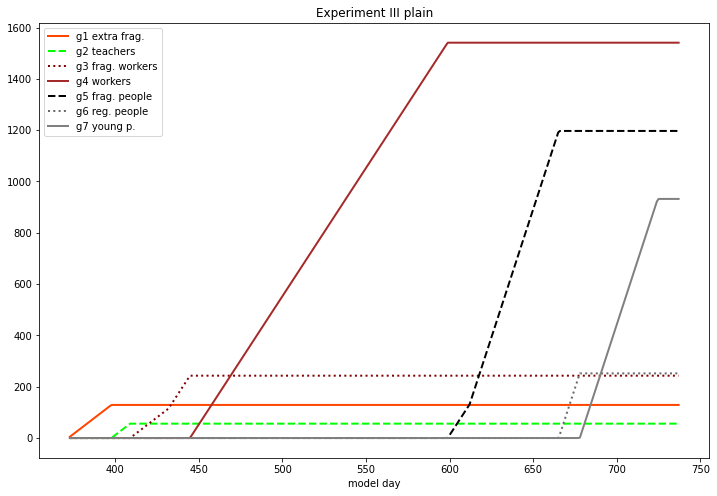

In [13]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment III wise

### quotas

In [14]:
tit="Experiment II wise"
q=\
[
[373,5,0.10,0.10,0.10,0.00,0.10,0.00,0.00],
[433,10,0.10,0.10,0.10,0.00,0.10,0.00,0.00],
[493,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[553,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[613,20,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
]

In [15]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [16]:
quotas

,day,q,g1,g2,g3,g4,g5,g6,g7
0,373,5,0.1,0.1,0.1,0.0,0.1,0.0,0.0
1,433,10,0.1,0.1,0.1,0.0,0.1,0.0,0.0
2,493,10,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,553,10,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,613,20,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [17]:
quotaM=np.matrix(q)

In [18]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [19]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [20]:
vaccinatedDF.astype(int)

,model day,g1 extra frag.,g2 teachers,g3 frag. workers,g4 workers,g5 frag. people,g6 reg. people,g7 young p.
0,373,5,0,0,0,0,0,0
1,374,10,0,0,0,0,0,0
2,375,15,0,0,0,0,0,0
3,376,20,0,0,0,0,0,0
4,377,25,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
360,733,129,56,243,1541,1197,252,932
361,734,129,56,243,1541,1197,252,932
362,735,129,56,243,1541,1197,252,932
363,736,129,56,243,1541,1197,252,932


<AxesSubplot:title={'center':'Experiment II wise'}, xlabel='model day'>

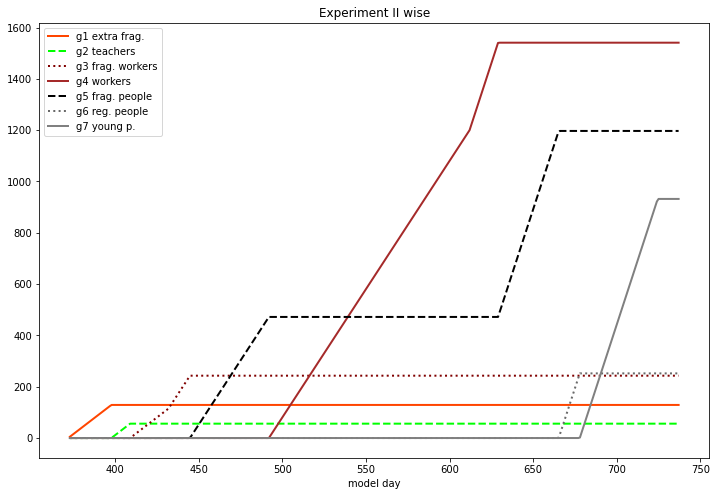

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment III GA 1

### quotas

In [22]:
tit="Experiment III GA 1"
q=\
[
[373,5,0.78,0.78,0.93,0.56,0.64,0.37,0.82],
[433,10,0.96,0.71,0.37,0,0.69,0.86,0],
[493,10,0.15,0.71,0.41,0,0.41,0.5,0.94],
[553,10,0.1,0.29,0.48,0.07,0.6,0.38,0.39],
[613,20,0.23,0.63,0.42,0.69,0.09,0.54,0.53],
]

In [23]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [24]:
quotas

,day,q,g1,g2,g3,g4,g5,g6,g7
0,373,5,0.78,0.78,0.93,0.56,0.64,0.37,0.82
1,433,10,0.96,0.71,0.37,0.00,0.69,0.86,0.00
2,493,10,0.15,0.71,0.41,0.00,0.41,0.50,0.94
3,553,10,0.10,0.29,0.48,0.07,0.60,0.38,0.39
4,613,20,0.23,0.63,0.42,0.69,0.09,0.54,0.53


In [25]:
quotaM=np.matrix(q)

In [26]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [27]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [28]:
#pd.set_option('display.max_rows',737-372)
vaccinatedDF.astype(int)

,model day,g1 extra frag.,g2 teachers,g3 frag. workers,g4 workers,g5 frag. people,g6 reg. people,g7 young p.
0,373,5,0,0,0,0,0,0
1,374,10,0,0,0,0,0,0
2,375,15,0,0,0,0,0,0
3,376,20,0,0,0,0,0,0
4,377,25,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
360,733,129,56,243,1541,1197,252,932
361,734,129,56,243,1541,1197,252,932
362,735,129,56,243,1541,1197,252,932
363,736,129,56,243,1541,1197,252,932


<AxesSubplot:title={'center':'Experiment III GA 1'}, xlabel='model day'>

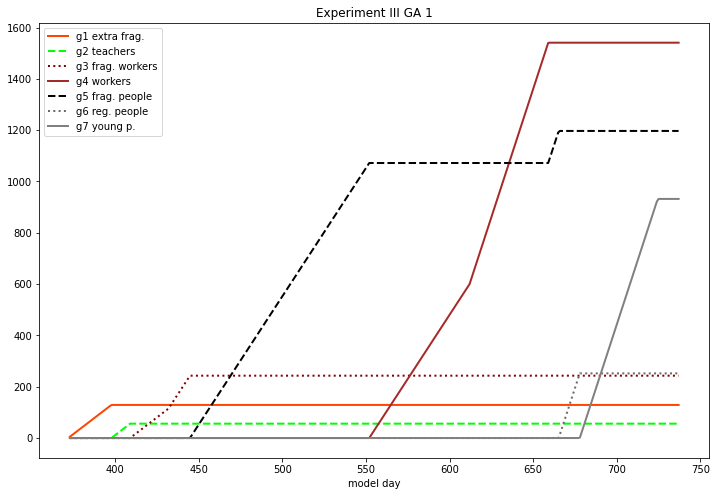

In [29]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment III GA 0

### quotas

In [30]:
tit="Experiment III GA 0"
q=\
[
[373,5,0.5,0.04,0.71,0.78,0.58,0.45,0.71],
[433,10,0.45,0.04,0.72,0,0.36,0.18,0.46],
[493,10,0.6,0.24,0.92,0.82,1,0.04,0.82],
[553,10,0.46,0.12,0.65,0.67,0.43,0.63,0.49],
[613,20,0.6,0.3,0.39,0.43,1,0.71,0.29],
]

In [31]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [32]:
quotas

,day,q,g1,g2,g3,g4,g5,g6,g7
0,373,5,0.50,0.04,0.71,0.78,0.58,0.45,0.71
1,433,10,0.45,0.04,0.72,0.00,0.36,0.18,0.46
2,493,10,0.60,0.24,0.92,0.82,1.00,0.04,0.82
3,553,10,0.46,0.12,0.65,0.67,0.43,0.63,0.49
4,613,20,0.60,0.30,0.39,0.43,1.00,0.71,0.29


In [33]:
quotaM=np.matrix(q)

In [34]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [35]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [36]:
#pd.set_option('display.max_rows',737-372)
vaccinatedDF.astype(int)

,model day,g1 extra frag.,g2 teachers,g3 frag. workers,g4 workers,g5 frag. people,g6 reg. people,g7 young p.
0,373,5,0,0,0,0,0,0
1,374,10,0,0,0,0,0,0
2,375,15,0,0,0,0,0,0
3,376,20,0,0,0,0,0,0
4,377,25,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
360,733,129,56,243,1541,1197,252,932
361,734,129,56,243,1541,1197,252,932
362,735,129,56,243,1541,1197,252,932
363,736,129,56,243,1541,1197,252,932


<AxesSubplot:title={'center':'Experiment III GA 0'}, xlabel='model day'>

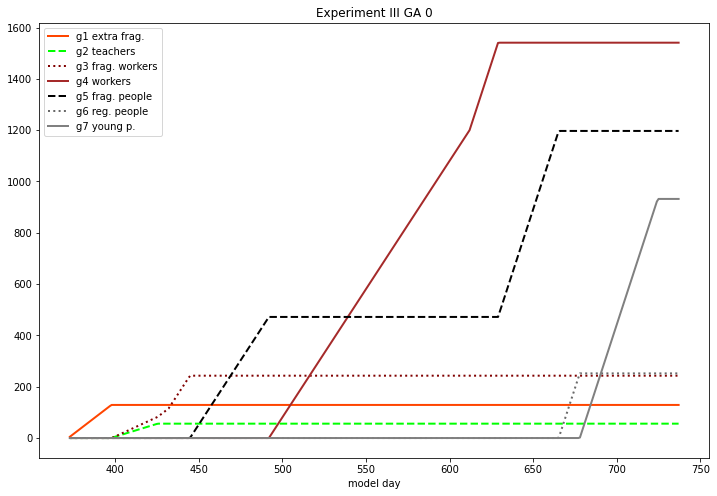

In [37]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment III GA 0.5

### quotas

In [38]:
tit="Experiment III GA 0,5"
q=\
[
[373,5,0.92,0.04,0.56,0.55,0.7,0.67,0.58],
[433,10,0.62,0.3,0.74,0.57,0.75,0.26,0.88],
[493,10,0.19,0.82,0.25,0.94,0.16,0.79,0.56],
[553,10,0.16,0.22,0.09,0.9,0.2,0.29,0.92],
[613,20,0.07,0.41,0.83,0.6,0.56,0.82,0.25],
]

In [39]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [40]:
quotas

,day,q,g1,g2,g3,g4,g5,g6,g7
0,373,5,0.92,0.04,0.56,0.55,0.70,0.67,0.58
1,433,10,0.62,0.30,0.74,0.57,0.75,0.26,0.88
2,493,10,0.19,0.82,0.25,0.94,0.16,0.79,0.56
3,553,10,0.16,0.22,0.09,0.90,0.20,0.29,0.92
4,613,20,0.07,0.41,0.83,0.60,0.56,0.82,0.25


In [41]:
quotaM=np.matrix(q)

In [42]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [43]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [44]:
#pd.set_option('display.max_rows',737-372)
vaccinatedDF.astype(int)

,model day,g1 extra frag.,g2 teachers,g3 frag. workers,g4 workers,g5 frag. people,g6 reg. people,g7 young p.
0,373,5,0,0,0,0,0,0
1,374,10,0,0,0,0,0,0
2,375,15,0,0,0,0,0,0
3,376,20,0,0,0,0,0,0
4,377,25,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
360,733,129,56,243,1541,1197,252,932
361,734,129,56,243,1541,1197,252,932
362,735,129,56,243,1541,1197,252,932
363,736,129,56,243,1541,1197,252,932


<AxesSubplot:title={'center':'Experiment III GA 0,5'}, xlabel='model day'>

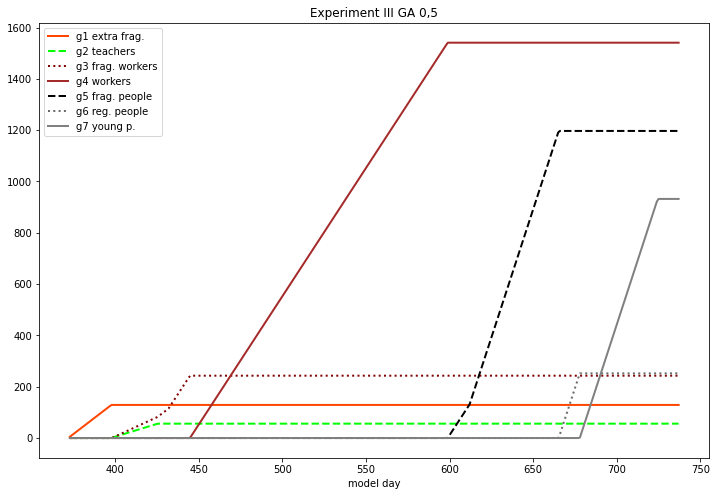

In [45]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)